
## Logistic Regression (MNIST)

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.\
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

The MNIST database of handwritten digits is available on the following website: MNIST Dataset

Four Files are available on this site:

train-images-idx3-ubyte.gz: training set images(9912422 bytes)\
train-labels-idx1-ubyte.gz: training set labels(28881 bytes)\
t10k-images-idx3-ubyte.gz: test set images(1648877 bytes)\
t10k-labels-idx1-ubyte.gz: test set labels(4542 bytes)

or download from https://github.com/mGalarnyk/Python_Tutorials/tree/master/Sklearn/Logistic_Regression/data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Used for Confusion Matrix
from sklearn import metrics

# Used for Loading MNIST
from struct import unpack

%matplotlib inline

### Load dataset

In [6]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [7]:

train_img, train_lbl = loadmnist('train-images-idx3-ubyte'
                                 , 'train-labels-idx1-ubyte')
test_img, test_lbl = loadmnist('t10k-images-idx3-ubyte'
                               , 't10k-labels-idx1-ubyte')

In [16]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### Showing Training Digits and Labels 

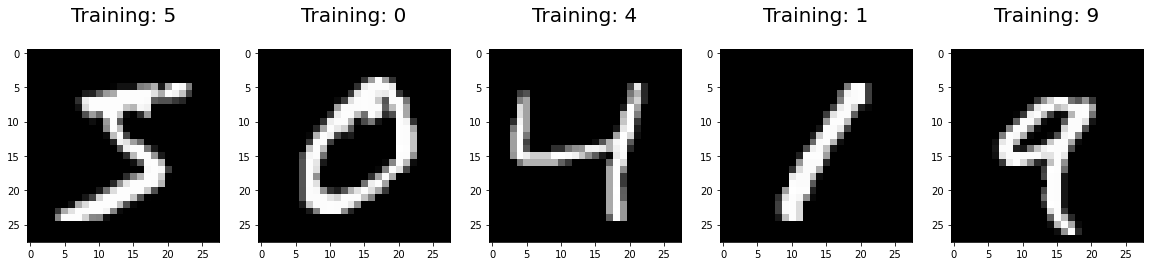

In [17]:
plt.figure(figsize = (20,4))
for index , (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1 , 5, index+1)
    #print(index)
    #print(np.reshape(image, (28,-1)))
    plt.imshow(np.reshape(image, (28,-1)), cmap = plt.cm.gray)   # We are reshaping the 784 x 1 matrix into 28x28 matrix
    plt.title('Training: %i\n' % label, fontsize = 20)

(784,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253

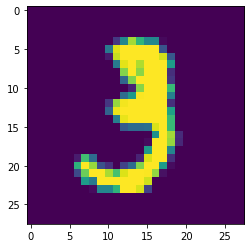

In [18]:
# This is how the computer sees the number 5
print(train_img[0].shape)
print(train_img[0].reshape(28,-1))
plt.imshow(train_img[10].reshape(28,-1)) 


## Using Logistic Regression on Entire Dataset

One thing I like to mention is the importance of parameter tuning. While it may not have mattered much for the toy digits dataset, it can make a major difference on larger and more complex datasets you have. Please see the parameter: solver

Step 1: Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes



In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
gnb = GaussianNB()

In [59]:
gnb.fit(train_img, train_lbl)

GaussianNB()

In [60]:
gnb.score(test_img,test_lbl)

0.5558

In [61]:
y_predict_gnb = gnb.predict(test_img)

In [23]:
df_tr1 = pd.DataFrame(train_img)
df_tr2 = pd.DataFrame(train_lbl)
df_ts1 = pd.DataFrame(test_img)
df_ts2 = pd.DataFrame(test_lbl)

<AxesSubplot:>

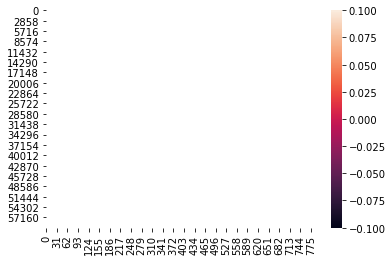

In [18]:
sns.heatmap(df_tr1.isnull()) 

<AxesSubplot:>

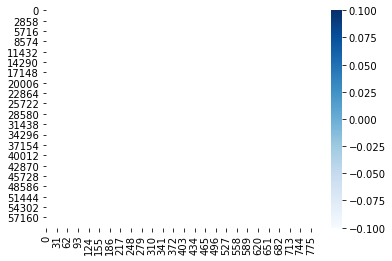

In [27]:
sns.heatmap(df_tr1.isnull(), cmap = 'Blues')

<AxesSubplot:>

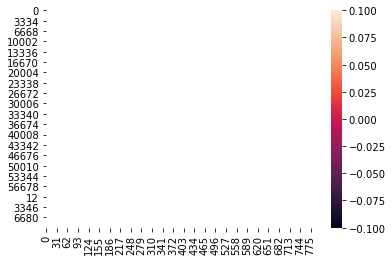

In [24]:
df1 = pd.concat([df_tr1, df_ts1])
df2 = pd.concat([df_tr2, df_ts2])
df = pd.concat([df1.T, df2.T])
df = df.T
sns.heatmap(df.isnull())   #No missing data in the dataset

In [1]:
import xgboost as xgb

In [4]:
model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')

In [24]:
model.fit(train_img, train_lbl)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [18]:
model.score(test_img, test_lbl)
#model.score(train_img, train_lbl)

0.978

In [11]:
from sklearn.linear_model import LogisticRegression

In [14]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter = 3000) # For faster convergence

In [15]:
logisticRegr.fit(train_img, train_lbl)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf = RandomForestClassifier(n_estimators = 10, criterion = "entropy")

In [20]:
clf.fit(train_img, train_lbl)

RandomForestClassifier(criterion='entropy', n_estimators=10)

## Random Forest is damn fast ...... 

In [23]:
clf.score(test_img, test_lbl)
#clf.score(train_img, train_lbl)

0.9491

In [30]:
y_pred_RF = clf.predict(test_img)

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

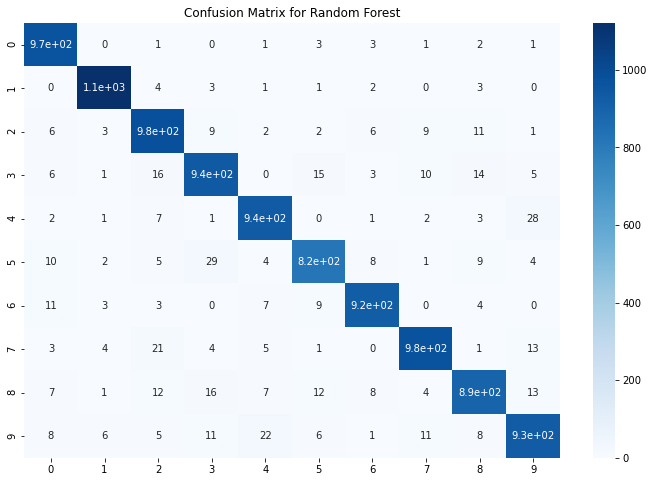

In [42]:
cm_RF = metrics.confusion_matrix(test_lbl, y_pred_RF)
plt.figure(figsize = (12,8))
sns.heatmap(cm_RF, annot = True, cmap = 'Blues');
plt.title("Confusion Matrix for Random Forest")

In [40]:
y_pred_XGboost = model.predict(test_img)

Text(0.5, 1.0, 'Confusion Matrix for XGboost')

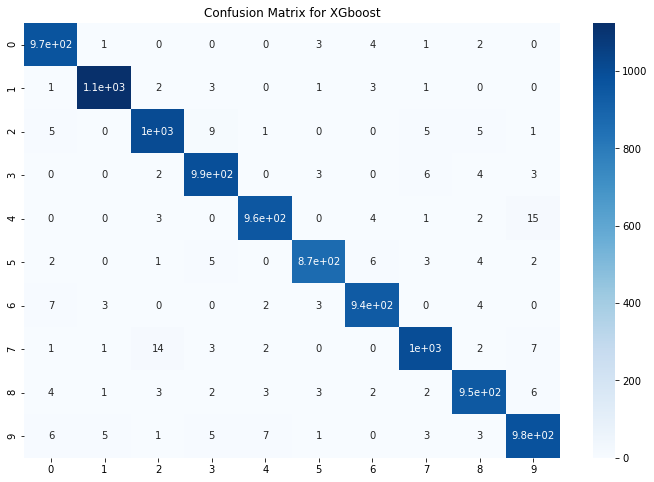

In [63]:
cm_XGboost = metrics.confusion_matrix(test_lbl, y_pred_XGboost)
plt.figure(figsize = (12,8))
sns.heatmap(cm_XGboost, annot = True, cmap = 'Blues');
plt.title("Confusion Matrix for XGboost")

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

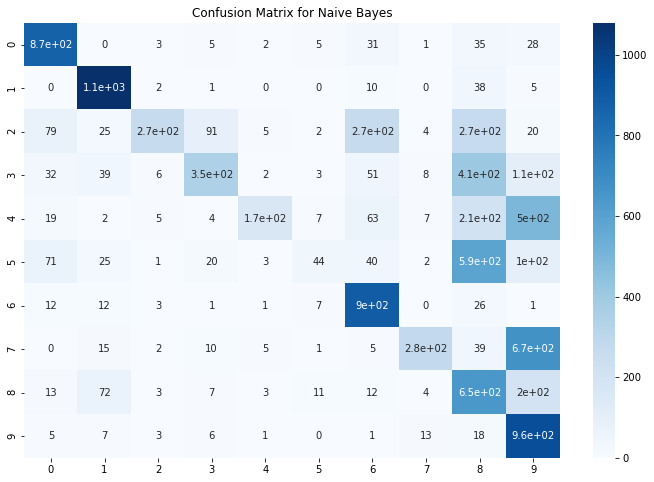

In [64]:
cm_NB = metrics.confusion_matrix(test_lbl, y_predict_gnb)
plt.figure(figsize = (12,8))
sns.heatmap(cm_NB, annot = True, cmap = 'Blues');
plt.title("Confusion Matrix for Naive Bayes")

### A lot more errors in Naive Bayes classifier

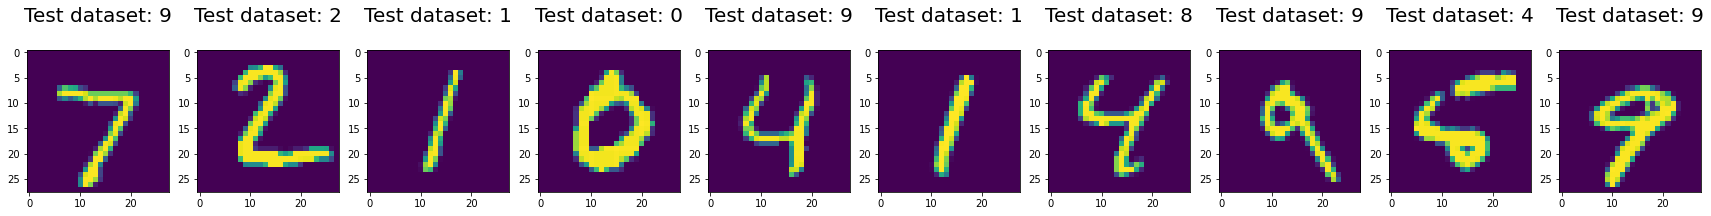

In [67]:
plt.figure(figsize = (30,8))
for index , (image, label) in enumerate(zip(test_img[0:10], y_predict_gnb[0:10])):
    plt.subplot(1 , 10, index+1)
    
    #print(index)
    #print(np.reshape(image, (28,-1)))
    plt.imshow(np.reshape(image, (28,-1)))   # We are reshaping the 784 x 1 matrix into 28x28 matrix
    plt.title('Test dataset: %i\n' % label, fontsize = 20)
 # A lot more errors in Naive Bayes classifier

### The predictions of Random Forest classifier is very accurate

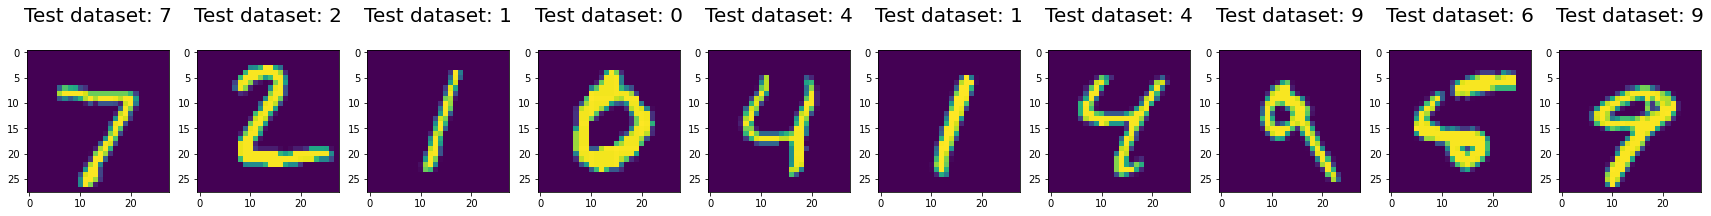

In [68]:
plt.figure(figsize = (30,8))
for index , (image, label) in enumerate(zip(test_img[0:10], y_pred_RF[0:10])):
    plt.subplot(1 , 10, index+1)
    
    #print(index)
    #print(np.reshape(image, (28,-1)))
    plt.imshow(np.reshape(image, (28,-1)))   # We are reshaping the 784 x 1 matrix into 28x28 matrix
    plt.title('Test dataset: %i\n' % label, fontsize = 20)

### Lets try Feature scaling

In [69]:
from sklearn.preprocessing import StandardScaler  

In [71]:
st_x = StandardScaler()  
x_train = st_x.fit_transform(train_img)
x_test= st_x.transform(test_img)  

In [73]:
gnb.fit(x_train, train_lbl)

GaussianNB()

In [75]:
gnb.score(x_test, test_lbl)

0.524

In [76]:
clf.fit(x_train, train_lbl)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [77]:
clf.score(x_test, test_lbl)

0.9473

Here we can see that Feature scaling is not needed

#### Lets Try out KNN classification in the problem

In [78]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, train_lbl)  

KNeighborsClassifier()

In [80]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [81]:
classifier.score(x_test, test_lbl)

0.9443

In [82]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(train_img, train_lbl)  

KNeighborsClassifier()

### KNN is fast and feature scaling is not needed in this dataset

In [89]:
classifier.score(train_img, train_lbl)  ## Accuracy without feature scaling 

0.9819166666666667

In [91]:
classifier.score(test_img, test_lbl)

0.9688

In [87]:
#Predicting the test set result  
y_pred_KNN = classifier.predict(test_img)  

Text(0.5, 1.0, 'Confusion Matrix for KNN')

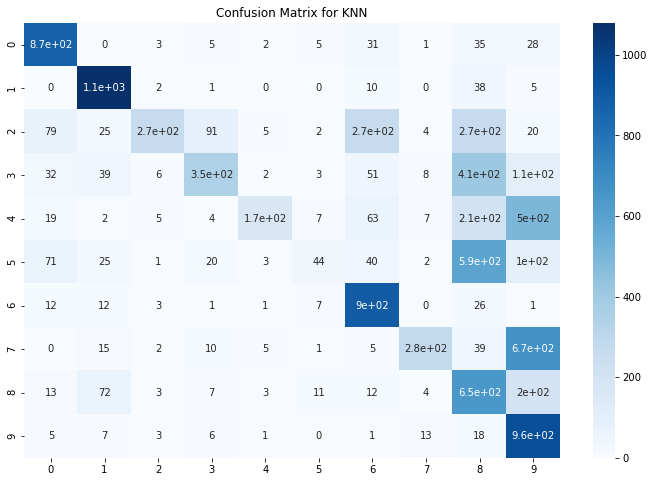

In [88]:
cm_KNN = metrics.confusion_matrix(test_lbl, y_pred_KNN)
plt.figure(figsize = (12,8))
sns.heatmap(cm_NB, annot = True, cmap = 'Blues');
plt.title("Confusion Matrix for KNN")

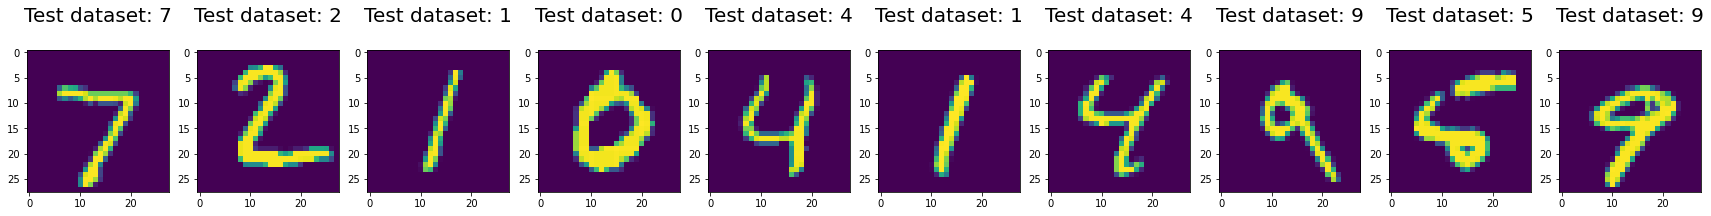

In [90]:
plt.figure(figsize = (30,8))
for index , (image, label) in enumerate(zip(test_img[0:10], y_pred_KNN[0:10])):
    plt.subplot(1 , 10, index+1)
    
    #print(index)
    #print(np.reshape(image, (28,-1)))
    plt.imshow(np.reshape(image, (28,-1)))   # We are reshaping the 784 x 1 matrix into 28x28 matrix
    plt.title('Test dataset: %i\n' % label, fontsize = 20)

In [92]:
cm_KNN

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

In [94]:
cm_NB

array([[ 870,    0,    3,    5,    2,    5,   31,    1,   35,   28],
       [   0, 1079,    2,    1,    0,    0,   10,    0,   38,    5],
       [  79,   25,  266,   91,    5,    2,  269,    4,  271,   20],
       [  32,   39,    6,  353,    2,    3,   51,    8,  409,  107],
       [  19,    2,    5,    4,  168,    7,   63,    7,  210,  497],
       [  71,   25,    1,   20,    3,   44,   40,    2,  586,  100],
       [  12,   12,    3,    1,    1,    7,  895,    0,   26,    1],
       [   0,   15,    2,   10,    5,    1,    5,  280,   39,  671],
       [  13,   72,    3,    7,    3,   11,   12,    4,  648,  201],
       [   5,    7,    3,    6,    1,    0,    1,   13,   18,  955]],
      dtype=int64)

In [95]:
cm_RF

array([[ 968,    0,    1,    0,    1,    3,    3,    1,    2,    1],
       [   0, 1121,    4,    3,    1,    1,    2,    0,    3,    0],
       [   6,    3,  983,    9,    2,    2,    6,    9,   11,    1],
       [   6,    1,   16,  940,    0,   15,    3,   10,   14,    5],
       [   2,    1,    7,    1,  937,    0,    1,    2,    3,   28],
       [  10,    2,    5,   29,    4,  820,    8,    1,    9,    4],
       [  11,    3,    3,    0,    7,    9,  921,    0,    4,    0],
       [   3,    4,   21,    4,    5,    1,    0,  976,    1,   13],
       [   7,    1,   12,   16,    7,   12,    8,    4,  894,   13],
       [   8,    6,    5,   11,   22,    6,    1,   11,    8,  931]],
      dtype=int64)

In [97]:
cm_XGboost

array([[ 969,    1,    0,    0,    0,    3,    4,    1,    2,    0],
       [   1, 1124,    2,    3,    0,    1,    3,    1,    0,    0],
       [   5,    0, 1006,    9,    1,    0,    0,    5,    5,    1],
       [   0,    0,    2,  992,    0,    3,    0,    6,    4,    3],
       [   0,    0,    3,    0,  957,    0,    4,    1,    2,   15],
       [   2,    0,    1,    5,    0,  869,    6,    3,    4,    2],
       [   7,    3,    0,    0,    2,    3,  939,    0,    4,    0],
       [   1,    1,   14,    3,    2,    0,    0,  998,    2,    7],
       [   4,    1,    3,    2,    3,    3,    2,    2,  948,    6],
       [   6,    5,    1,    5,    7,    1,    0,    3,    3,  978]],
      dtype=int64)